# Challenge 3

In [1]:
# import libraries here
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Import the titanic file. Name your dataset `titanic`.

In [2]:
titanic = pd.read_csv('./titanic.csv',low_memory=False)
titanic.head().T

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Gender,male,female,female,female,male
Age,22,38,26,35,35
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05


#### Explore the titanic dataset using Pandas dtypes

In [3]:
#your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?

*Hint: Use Pandas `select_dtypes`*

In [4]:
# your code here- numerical variable
titanic.select_dtypes(int, float).head(1)


,PassengerId,Pclass,SibSp,Parch
0,1,3,1,0


In [5]:
#your code here- categorical variable
titanic.select_dtypes(object).head(1)


,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S


#### Set the plot style to `classic` and the figure size to `(12,6)`

*Hint: To set the style you can use `matplotlib.pyplot` functions or seaborn*

In [6]:
# no entiendo
plt.figure(figsize=(12,6))
plt.style.use('classic')
sns.set_style('whitegrid')

<Figure size 864x432 with 0 Axes>

#### Use the appropriate visulalization to show the distribution of the column `Age`

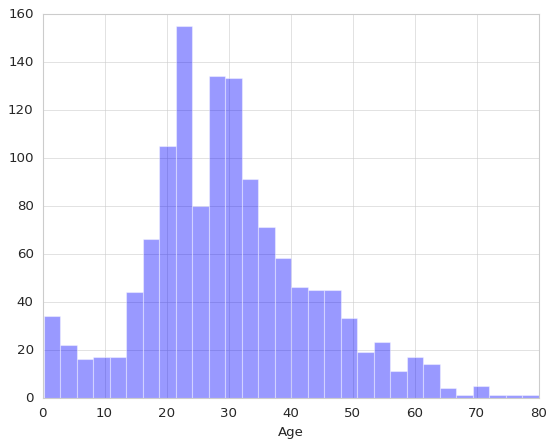

In [7]:
# your code here
sns.distplot(titanic["Age"], kde=False, rug=False)

#### Use subplots to plot the distribution of the `Age` variable with bins equal to `10`, `20` and `50`.

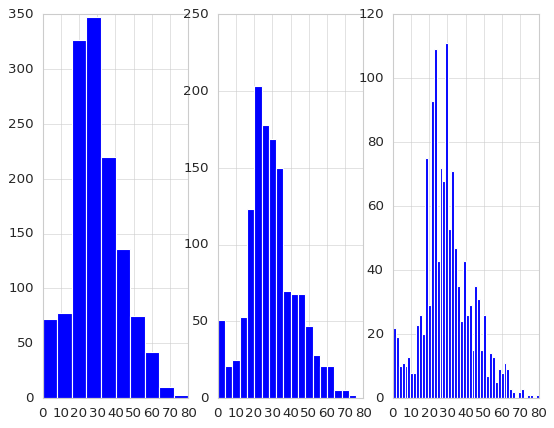

In [8]:
# your code here
plt.subplot(1,3,1)
titanic["Age"].hist(bins=10)
plt.subplot(1,3,2)
titanic["Age"].hist(bins=20)
plt.subplot(1,3,3)
titanic["Age"].hist(bins=50)

#### Use seaborn to show the distribution of the column `Age`

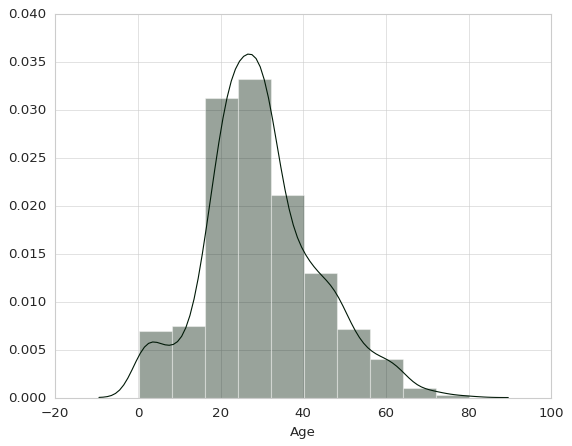

In [23]:
# your code here
sns.distplot(titanic["Age"],bins=10, color='#001907')

#### Use the appropriate plot to visualize the column `Gender`. There are 2 ways of doing it. Do it both ways.

*Hint: Use matplotlib and seaborn*

/home/jjespper/.local/lib/python3.6/site-packages/pandas/plotting/_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


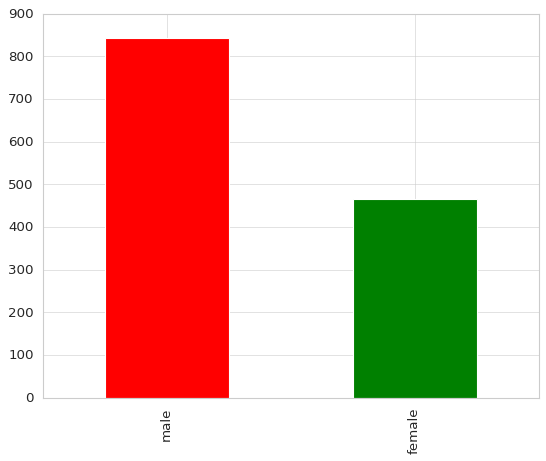

In [33]:
# your code here- 1st way
b =titanic['Gender'].value_counts()
b.plot(kind="bar", colors=('r','g'))

In [40]:
# your code here- 2nd way
sns.set(style='darkgrid')

sns.countplot(x = 'Gender',
              data = titanic,
              order = titanic('Gender').value_counts().index)
plt.show()

TypeError: 'DataFrame' object is not callable

#### Use the appropriate plot to visualize the column `Pclass` 


In [12]:
# your code here


#### We would like to have in one single plot the summary statistics of the feature `Age`. Choose the appropriate plot to show below.

In [13]:
# your code here


#### What does the previous plot tell you about the feature `Age`? Comment.

In [14]:
# your comment here


#### Now in addition to the summary statistics, we also want to visualize the distribution of `Age`. Choose the appropriate plot to sow below.

In [15]:
#your code here


#### What additional information in the previous plot provide you about the feature `Age`? Comment.

In [16]:
#your comment here


#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the appropriate plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.

*Hint: One of the ways involves using Seaborn*

In [17]:
#your code-1st way


In [18]:
# your code-2nd way


#### Using Seaborn plot the correlation matrix of various features.

*Hint: search how to use `heatmap`*

In [19]:
#your code here


#### According to the previous plot, what are the most correlated feature? Comment.

In [20]:
#your comment here


#### Use the appropriate plot to display the summary statistics of the `Age` in function of the `Pclass`.

*Hint: use boxplot to display summary statistics of `Age` in relation to each of the discrete values of `Pclass`*

In [21]:
#your code here


#### Use the appropriate plot to display the distributions of  `Age` in relation to  `Gender`.

*Hint: use Facetgrid to display the distribution of `Age` for each categorical value of `Gender`*

In [22]:
#your code here
